# Demo matplotlib

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
x = np.linspace(1, 10, 100)
y = np.sin(x)

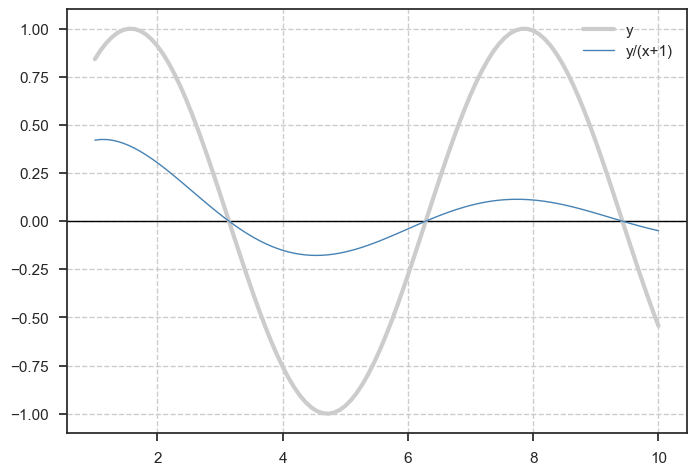

In [146]:
plt.axhline(0, color='black', linewidth=1)
plt.plot(x, y, color='0.8', linewidth=3, label='y')
plt.plot(x, y/(x+1), color='steelblue', linewidth=1, label='y/(x+1)')
plt.grid(linestyle='dashed')
plt.legend()
plt.savefig('plaatje.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


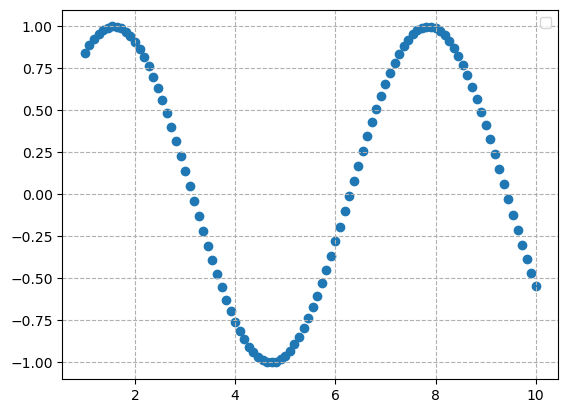

In [117]:
plt.scatter(x, y)
plt.grid(linestyle='dashed')
plt.legend()
plt.show()

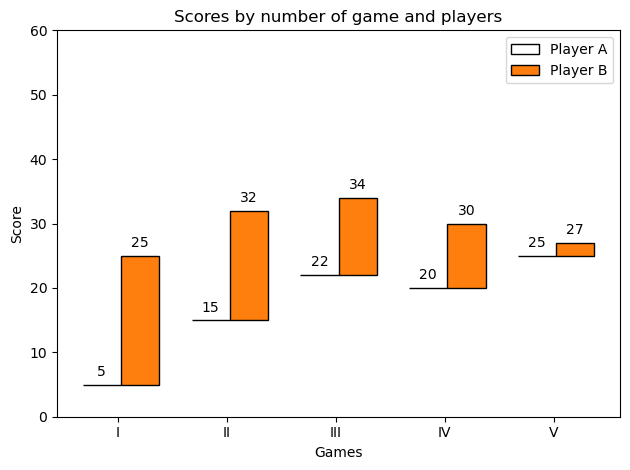

In [26]:
import matplotlib.pyplot as plt
import numpy as np


def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)


# initialise labels and a numpy array make sure you have
# N labels of N number of values in the array
xlabels = ['I', 'II', 'III', 'IV', 'V']
playerA = np.array([5, 15, 22, 20, 25])
playerB = np.array([25, 32, 34, 30, 27])

fig, ax = plt.subplots()
hat_graph(ax, xlabels, [playerA, playerB], ['Player A', 'Player B'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Games')
ax.set_ylabel('Score')
ax.set_ylim(0, 60)
ax.set_title('Scores by number of game and players')
ax.legend()

fig.tight_layout()
plt.show()

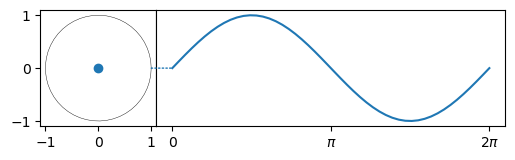

In [67]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch

fig, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
axr.set_box_aspect(1 / 3)
axr.yaxis.set_visible(False)
axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(x), np.sin(x), "k", lw=0.3)
point, = axl.plot(0, 0, "o")

# draw full curve to set view limits in right Axes
sine, = axr.plot(x, np.sin(x))

# draw connecting line between both graphs
con = ConnectionPatch(
    (1, 0),
    (0, 0),
    "data",
    "data",
    axesA=axl,
    axesB=axr,
    color="C0",
    ls="dotted",
)
fig.add_artist(con)


def animate(i):
    x = np.linspace(0, i, int(i * 25 / np.pi))
    sine.set_data(x, np.sin(x))
    x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    con.xy1 = x, y
    con.xy2 = i, y
    return point, sine, con


ani = animation.FuncAnimation(
    fig,
    animate,
    interval=10000000,
    blit=False,  # blitting can't be used with Figure artists
    frames=x,
    repeat_delay=100,
)

plt.show()

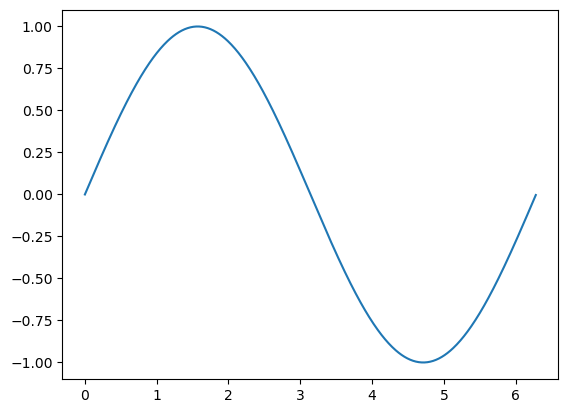

In [72]:

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=2000000, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [40]:
np.random.randint(1, 100, 8)

array([98, 44, 34, 84, 91, 30, 88, 10])

In [39]:
np.random.seed(20241107)

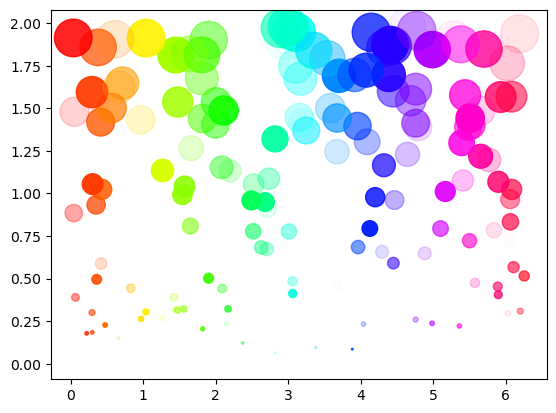

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
alpha = np.random.rand(N)
colors = theta

fig = plt.figure()
ax = fig.add_subplot()
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=alpha)

In [64]:
colors

array([5.52397487, 5.65124302, 0.41152151, 2.19394358, 3.03973142,
       4.7565448 , 0.3567376 , 1.43892652, 3.95382204, 1.81475488,
       6.25312158, 2.62701048, 6.18956635, 4.79060126, 0.34887299,
       1.99618589, 6.08062881, 0.37572663, 0.05037426, 3.67088737,
       4.08742671, 5.09941094, 2.73280647, 4.44479932, 3.67302349,
       4.44910046, 1.55909645, 3.06033431, 1.26213805, 4.464474  ,
       3.96209951, 6.06833885, 4.14502183, 5.35971309, 3.00915864,
       5.92839762, 3.10992023, 6.06010408, 2.70410614, 1.26494206,
       3.37811001, 2.51591194, 1.44608011, 2.16770207, 2.10808484,
       1.65985912, 4.88146771, 4.98518759, 5.57461868, 0.71308476,
       0.56189261, 0.47253534, 3.69872352, 5.69860113, 2.08724528,
       4.44497147, 4.1979633 , 2.67816291, 0.21852933, 3.66853073,
       0.96315737, 1.5391299 , 2.00696468, 3.53692289, 4.6858427 ,
       4.33216858, 4.64420462, 5.65341537, 3.24712439, 1.90057103,
       1.80678357, 4.98282289, 0.29214473, 2.92496352, 6.03216

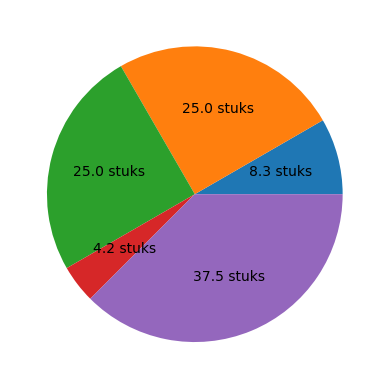

In [61]:
data = [2,6,6,1,9]

plt.pie(data, autopct = lambda s: f'{s:.1f} stuks')
plt.show()


In [53]:
def my_func(a, b):
    return 3 * a + 6 * b - 10

In [54]:
my_func(3,6)

35

In [56]:
f = lambda a, b: 3 * a + 6 * b - 10

In [57]:
f(3, 6)

35

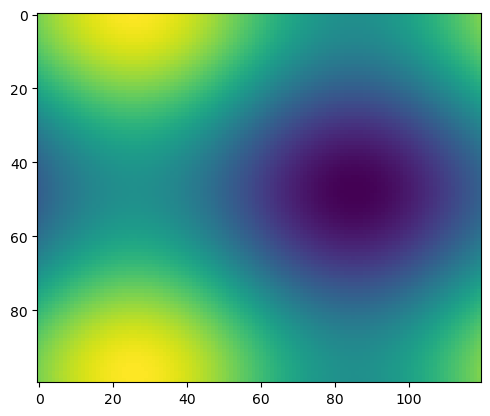

In [71]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15
    y += np.pi / 30
    im = ax.imshow(f(x, y), animated=True)
    if i == 0:
        ax.imshow(f(x, y))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

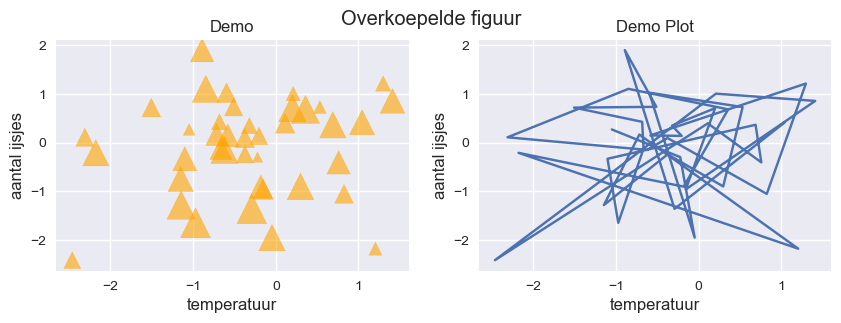

In [147]:
x = np.random.randn(40)
y = np.random.randn(40)

plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

# plt.scatter(x, y)
# plt.title('Demo')

sizes = np.random.randint(50, 500, len(x))

ax[0].scatter(x, y, marker='^', s=sizes, color='orange', alpha=0.6)
ax[0].set_title('Demo')
ax[0].set_xlabel('temperatuur')
ax[0].set_ylabel('aantal ijsjes')

ax[1].plot(x, y)
ax[1].set_title('Demo Plot')
ax[1].set_xlabel('temperatuur')
ax[1].set_ylabel('aantal ijsjes')

fig.suptitle('Overkoepelde figuur')

plt.savefig('plaatje.png')
plt.show()

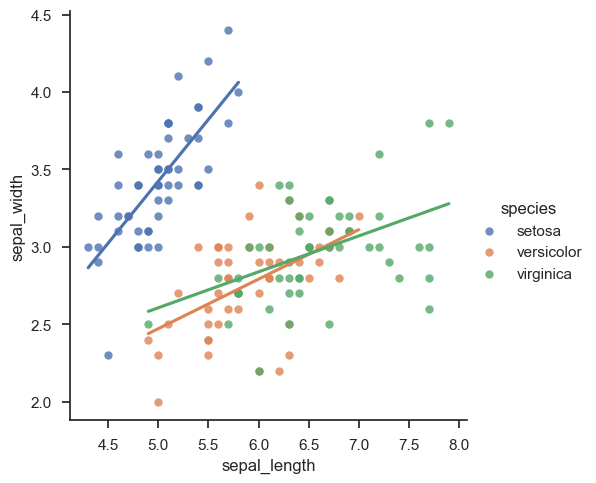

In [148]:
import seaborn as sns

sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("iris")

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x="sepal_length", y="sepal_width", ci=False, hue='species'
)

plt.savefig('plaatje.png')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
